This study is the combination of the other three: Superlong_st21&23avg_vs_trolley_Jonathan, Superlong_st22_vs_trolley_Jonathan and Superlong_st22_vs_st21&23avg_Jonathan. This notebook is less commented than the other three, which will include all the code presented here except for comparing studies. I will work on removing plots that are included in the other notebooks

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import scipy
import math

#import gm2
import trfp
import plotting_functions as plt2
import analysis_helper as helper
import helper_function_candidates as helper_old
import allantools

Welcome to JupyROOT 6.22/02


In [2]:
filename = 'hdf5/superlong_1.h5'
sl_interp_df = pd.read_hdf(filename)
sl_interp_df.head()

,tr_phi,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,tr8,...,fp368,fp369,fp370,fp371,fp372,fp373,fp374,fp375,fp376,fp377
1.561686e+09,99.03,50625.282289,50695.175241,50623.568028,50590.890600,50627.860872,50841.099085,50846.032866,50761.144504,50651.405339,...,49358.754228,51972.651063,58751.412542,51173.099444,55189.673583,53996.719193,50613.938797,49710.362824,52421.436882,46595.758148
1.561686e+09,99.03,50625.144811,50696.154995,50623.898543,50589.724314,50628.095805,50841.443181,50846.025561,50761.018168,50651.757945,...,49359.440426,51973.363894,58751.326176,51177.676627,55204.349600,53997.790585,50613.614889,49711.315633,52423.305698,46596.221764
1.561686e+09,99.03,50625.571409,50695.602150,50624.132975,50590.285045,50628.158088,50842.620827,50845.841783,50761.312786,50651.934370,...,49358.860803,51971.305428,58751.018319,51173.212245,55211.311004,53997.463848,50613.595166,49711.651783,52423.315386,46596.003791
1.561686e+09,99.03,50625.042840,50695.608167,50623.607812,50590.823742,50627.977257,50842.300765,50845.672829,50760.620699,50651.143564,...,49359.406480,51970.977290,58750.270925,51170.368011,55205.863488,53997.052242,50613.686940,49711.218738,52421.839473,46595.307829
1.561686e+09,99.03,50624.275995,50695.853025,50623.022568,50590.519257,50627.065251,50842.163013,50845.590939,50760.695784,50650.515117,...,49359.964563,51971.807276,58749.740118,51171.032852,55191.996556,53997.248508,50613.777970,49710.085258,52420.701335,46595.400754


In [3]:
sl_moment_df = helper.calc_moment_df(sl_interp_df)

Finished calculating all moments for 252363 events.   


In [4]:
sl_moment_df.head()
run_start = sl_moment_df.index.values[0]

In [5]:
T = sl_moment_df.index.to_numpy()
st22m1_list = sl_moment_df["st22,m1"].to_numpy()
st21m1_list = sl_moment_df["st21,m1"].to_numpy()
st23m1_list = sl_moment_df["st23,m1"].to_numpy()
trm1_list   = sl_moment_df["tr,m1"].to_numpy()

st22m2_list = sl_moment_df["st22,m2"].to_numpy()
st21m2_list = sl_moment_df["st21,m2"].to_numpy()
st23m2_list = sl_moment_df["st23,m2"].to_numpy()
trm2_list   = sl_moment_df["tr,m2"].to_numpy()

st22m3_list = sl_moment_df["st22,m3"].to_numpy()
trm3_list   = sl_moment_df["tr,m3"].to_numpy()
st21m3_list = sl_moment_df["st21,m3"].to_numpy()
st23m3_list = sl_moment_df["st23,m3"].to_numpy()

st22m4_list = sl_moment_df["st22,m4"].to_numpy()
st21m4_list = sl_moment_df["st21,m4"].to_numpy()
st23m4_list = sl_moment_df["st23,m4"].to_numpy()
trm4_list   = sl_moment_df["tr,m4"].to_numpy()

st22m5_list = sl_moment_df["st22,m5"].to_numpy()
st21m5_list = sl_moment_df["st21,m5"].to_numpy()
st23m5_list = sl_moment_df["st23,m5"].to_numpy()
trm5_list   = sl_moment_df["tr,m5"].to_numpy()

st22m6_list = sl_moment_df["st22,m6"].to_numpy()
st21m6_list = sl_moment_df["st21,m6"].to_numpy()
st23m6_list = sl_moment_df["st23,m6"].to_numpy()
trm6_list   = sl_moment_df["tr,m6"].to_numpy()

trm7_list   = sl_moment_df["tr,m7"].to_numpy()


KeyError: 'st22,m6'

In [ ]:
y1 = (trm1_list - st22m1_list)
y2 = (trm2_list - st22m2_list)
y3 = (trm3_list - st22m3_list)
y4 = (trm4_list - st22m4_list)
y5 = (trm5_list - st22m5_list)
y6 = (trm6_list - st22m6_list)

sa1 = (st21m1_list + st23m1_list)/2 #station averages
sa2 = (st21m2_list + st23m2_list)/2
sa3 = (st21m3_list + st23m3_list)/2
sa4 = (st21m4_list + st23m4_list)/2
sa5 = (st21m5_list + st23m5_list)/2
sa6 = (st21m6_list + st23m6_list)/2

st1 = (trm1_list - sa1) 
st2 = (trm2_list - sa2)
st3 = (trm3_list - sa3)
st4 = (trm4_list - sa4)
st5 = (trm5_list - sa5)
st6 = (trm6_list - sa6)

ss1 = (st22m1_list-sa1)
ss2 = (st22m2_list-sa2)
ss3 = (st22m3_list-sa3)
ss4 = (st22m4_list-sa4)
ss5 = (st22m5_list-sa5)
ss6 = (st22m6_list-sa6)

print('Min m = 1:', min(y1) , ' , max:' , max (y1)) #the m1 measured by the station is higher.
print('Min m = 2:', min(y2) , ' , max:' , max (y2)) #Otherwise
print('Min m = 3:', min(y3) , ' , max:' , max (y3))
print('Min m = 4:', min(y4) , ' , max:' , max (y4))
print('Min m = 5:', min(y5) , ' , max:' , max (y5))
print('Min m = 6:', min(y6) , ' , max:' , max (y6))
print('')
print('min and max for trolley minus station average')
print('Min m = 1:', min(st1) , ' , max:' , max (st1)) # moments measured by trolley are larger
print('Min m = 2:', min(st2) , ' , max:' , max (st2)) 
print('Min m = 3:', min(st3) , ' , max:' , max (st3))
print('Min m = 4:', min(st4) , ' , max:' , max (st4))
print('Min m = 5:', min(st5) , ' , max:' , max (st5))
print('Min m = 6:', min(st6) , ' , max:' , max (st6))
print('')
print('min and max for station minus station average')
print('Min m = 1:', min(ss1) , ' , max:' , max (ss1)) # Moment measured by station is heigher than the average
print('Min m = 2:', min(ss2) , ' , max:' , max (ss2)) 
print('Min m = 3:', min(ss3) , ' , max:' , max (ss3))
print('Min m = 4:', min(ss4) , ' , max:' , max (ss4)) # Otherwise
print('Min m = 5:', min(ss5) , ' , max:' , max (ss5)) # Otherwise too
print('Min m = 6:', min(ss6) , ' , max:' , max (ss6))

In [ ]:
t = np.logspace(0, math.log(len(st22m1_list),10), 50)  # tau values from 1 to length of columns
y1 = abs(trm1_list - st22m1_list)
y2 = abs(trm2_list - st22m2_list)
y3 = abs(trm3_list - st22m3_list)
y4 = abs(trm4_list - st22m4_list)
y5 = abs(trm5_list - st22m5_list)
y6 = abs(trm6_list - st22m6_list)
r = 1 # sample rate in Hz of the input data

st1 = abs(trm1_list - sa1) 
st2 = abs(trm2_list - sa2)
st3 = abs(trm3_list - sa3)
st4 = abs(trm4_list - sa4)
st5 = abs(trm5_list - sa5)
st6 = abs(trm6_list - sa6)

ss1 = abs(st22m1_list-sa1)
ss2 = abs(st22m2_list-sa2)
ss3 = abs(st22m3_list-sa3)
ss4 = abs(st22m4_list-sa4)
ss5 = abs(st22m5_list-sa5)
ss6 = abs(st22m6_list-sa6)

(t1, ad1, ade, adn) = allantools.oadev(y1, rate=r, data_type="freq", taus = t)  # Compute the overlapping ADEV
(t2, ad2, ade, adn) = allantools.oadev(y2, rate=r, data_type="freq", taus = t)
(t3, ad3, ade, adn) = allantools.oadev(y3, rate=r, data_type="freq", taus = t)  
(t4, ad4, ade, adn) = allantools.oadev(y4, rate=r, data_type="freq", taus = t)
(t5, ad5, ade, adn) = allantools.oadev(y5, rate=r, data_type="freq", taus = t) 
(t6, ad6, ade, adn) = allantools.oadev(y6, rate=r, data_type="freq", taus = t) 

(ts1, ads1, ade, adn) = allantools.oadev(ss1, rate=r, data_type="freq", taus = t)  # Compute the overlapping ADEV
(ts2, ads2, ade, adn) = allantools.oadev(ss2, rate=r, data_type="freq", taus = t)
(ts3, ads3, ade, adn) = allantools.oadev(ss3, rate=r, data_type="freq", taus = t)  
(ts4, ads4, ade, adn) = allantools.oadev(ss4, rate=r, data_type="freq", taus = t)
(ts5, ads5, ade, adn) = allantools.oadev(ss5, rate=r, data_type="freq", taus = t) 
(ts6, ads6, ade, adn) = allantools.oadev(ss6, rate=r, data_type="freq", taus = t) 

(tt1, adt1, ade, adn) = allantools.oadev(st1, rate=r, data_type="freq", taus = t)  # Compute the overlapping ADEV
(tt2, adt2, ade, adn) = allantools.oadev(st2, rate=r, data_type="freq", taus = t)
(tt3, adt3, ade, adn) = allantools.oadev(st3, rate=r, data_type="freq", taus = t)  
(tt4, adt4, ade, adn) = allantools.oadev(st4, rate=r, data_type="freq", taus = t)
(tt5, adt5, ade, adn) = allantools.oadev(st5, rate=r, data_type="freq", taus = t) 
(tt6, adt6, ade, adn) = allantools.oadev(st6, rate=r, data_type="freq", taus = t) 

#(tss1, adss1, ade, adn) = allantools.oadev(st22m1_list + sa1, rate=r, data_type="freq", taus = t)  # Compute the overlapping ADEV
#(tss2, adss2, ade, adn) = allantools.oadev(st22m2_list + sa2, rate=r, data_type="freq", taus = t)
#(tss3, adss3, ade, adn) = allantools.oadev(st22m3_list + sa3, rate=r, data_type="freq", taus = t)  
#(tss4, adss4, ade, adn) = allantools.oadev(st22m4_list + sa4, rate=r, data_type="freq", taus = t)
#(tss5, adss5, ade, adn) = allantools.oadev(st22m5_list + sa5, rate=r, data_type="freq", taus = t) 
#(tss6, adss6, ade, adn) = allantools.oadev(st22m6_list + sa6, rate=r, data_type="freq", taus = t) 

avgt1 = t1[np.where(ad1==ad1.min())][0]
avgt2 = t2[np.where(ad2==ad2.min())][0]
avgt3 = t3[np.where(ad3==ad3.min())][0]
avgt4 = t4[np.where(ad4==ad4.min())][0]
avgt5 = t5[np.where(ad5==ad5.min())][0]
avgt6 = t6[np.where(ad6==ad6.min())][0]

avgtt1 = tt1[np.where(adt1==adt1.min())][0]
avgtt2 = tt2[np.where(adt2==adt2.min())][0]
avgtt3 = tt3[np.where(adt3==adt3.min())][0]
avgtt4 = tt4[np.where(adt4==adt4.min())][0]
avgtt5 = tt5[np.where(adt5==adt5.min())][0]
avgtt6 = tt6[np.where(adt6==adt6.min())][0]
#time where the allan deviations are at minimum (best averaging time):
avgts1 = ts1[np.where(ads1==ads1.min())][0]
avgts2 = ts2[np.where(ads2==ads2.min())][0]
avgts3 = ts3[np.where(ads3==ads3.min())][0]
avgts4 = ts4[np.where(ads4==ads4.min())][0]
avgts5 = ts5[np.where(ads5==ads5.min())][0]
avgts6 = ts6[np.where(ads6==ads6.min())][0]

#avgtss1 = ts1[np.where(adss1==adss1.min())][0]
#avgtss2 = ts2[np.where(adss2==adss2.min())][0]
#avgtss3 = ts3[np.where(adss3==adss3.min())][0]
#avgtss4 = ts4[np.where(adss4==adss4.min())][0]
#avgtss5 = ts5[np.where(adss5==adss5.min())][0]
#avgtss6 = ts6[np.where(adss6==adss6.min())][0]


In [ ]:
adss1m = np.array([min(adss1), max(adss1)])         #st22 vs avg
adss2m = np.array([min(adss2), max(adss2)])
adss3m = np.array([min(adss3), max(adss3)])
adss4m = np.array([min(adss4), max(adss4)])
adss5m = np.array([min(adss5), max(adss5)])
adss6m = np.array([min(adss6), max(adss6)])

fig, axs = plt.subplots(3, 2, constrained_layout=True)
fig.set_figheight(11)
fig.set_figwidth(8)

axs[0,0].plot(tss1, adss1)
axs[0,0].set_xscale('log')
axs[0,0].set_yscale('log')
axs[0,0].set_xlabel("Time in s, min at " + str(avgtss1))
axs[0,0].set_ylabel("Allan Deviation")
axs[0,0].set_title('m1')

axs[0,1].plot(tss2, adss2)
axs[0,1].set_xscale('log')
axs[0,1].set_yscale('log')
axs[0,1].set_xlabel("Time in s, min at " + str(avgtss2))
axs[0,1].set_ylabel("Allan Deviation")
axs[0,1].set_title('m2')

axs[1,0].plot(tss3, adss3)
axs[1,0].set_xscale('log')
axs[1,0].set_yscale('log')
axs[1,0].set_xlabel("Time in s, min at " + str(avgtss3))
axs[1,0].set_ylabel("Allan Deviation")
axs[1,0].set_title('m3')

axs[1,1].plot(tss4, adss4)
axs[1,1].set_xscale('log')
axs[1,1].set_yscale('log')
axs[1,1].set_xlabel("Time in s, min at " + str(avgtss4))
axs[1,1].set_ylabel("Allan Deviation")
axs[1,1].set_title('m4')

axs[2,0].plot(tss5, adss5)
axs[2,0].set_xscale('log')
axs[2,0].set_yscale('log')
axs[2,0].set_xlabel("Time in s, min at " + str(avgtss5))
axs[2,0].set_ylabel("Allan Deviation")
axs[2,0].set_title('m5')

axs[2,1].plot(tss6, adss6)
axs[2,1].set_xscale('log')
axs[2,1].set_yscale('log')
axs[2,1].set_xlabel("Time in s, min at " + str(avgtss6))
axs[2,1].set_ylabel("Allan Deviation")
axs[2,1].set_title('m6')
fig.suptitle("st22 adev + st22&23 avg adev")

plt.show()

In [6]:
AD1 = ad1 + adt1
AD2 = ad2 + adt2
AD3 = ad3 + adt3
AD4 = ad4 + adt4
AD5 = ad5 + adt5
AD6 = ad6 + adt6

Combined_min1 = t1[np.where(AD1 == min(AD1))][0]
Combined_min2 = t2[np.where(AD2 == min(AD2))][0]
Combined_min3 = t3[np.where(AD3 == min(AD3))][0]
Combined_min4 = t4[np.where(AD4 == min(AD4))][0]
Combined_min5 = t5[np.where(AD5 == min(AD5))][0]
Combined_min6 = t6[np.where(AD6 == min(AD6))][0]

plt.plot(t1, AD1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Min at " + str(Combined_min1))
plt.title("m1")
plt.ylabel("Sum of Allan Deviation (Hz)")
plt.show()

plt.plot(t2, AD2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Min at " + str(Combined_min2))
plt.title("m2")
plt.ylabel("Sum of Allan Deviation (Hz)")
plt.show()

plt.plot(t3, AD3)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Min at " + str(Combined_min3))
plt.title("m3")
plt.ylabel("Sum of Allan Deviation (Hz)")
plt.show()

plt.plot(t4, AD4)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Min at " + str(Combined_min4))
plt.title("m4")
plt.ylabel("Sum of Allan Deviation (Hz)")
plt.show()

plt.plot(t5, AD5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Min at " + str(Combined_min5))
plt.ylabel("Sum of Allan Deviation (Hz)")
plt.title("m5")
plt.show()

plt.plot(t6, AD6)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Min at " + str(Combined_min6))
plt.title("m6")
plt.ylabel("Sum of Allan Deviation (Hz)")
plt.show()

NameError: name 'ad1' is not defined

In [7]:
def plt_unix_time_to_CST(ax):
    ax.locator_params(axis='x', nbins=5)
    xticks = ax.get_xticks()
    ax.set_xticklabels([pd.to_datetime(tm, unit='s').tz_localize('UTC').tz_convert('US/Central').strftime('%Y-%m-%d\n %H:%M:%S %Z')
                        for tm in xticks], rotation=0, fontdict={'size':12, 'family':'serif'})

To see the Allan deviations of the three possible differences, please look at their respective notebooks.

NameError: name 'ts1' is not defined

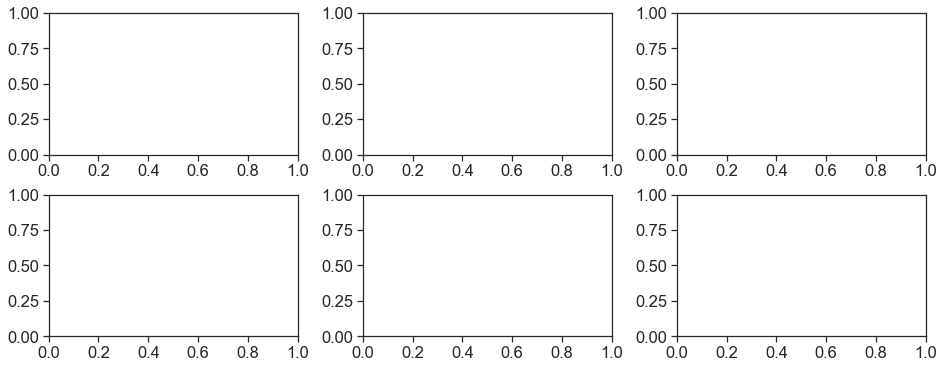

In [8]:
fig, axs = plt.subplots(2, 3, constrained_layout=True)
fig.set_figheight(5)
fig.set_figwidth(13)
axs[0,0].plot(ts1, ads1, label = "|tp - st 21 and 23 avg|")
axs[0,0].plot(t1, ad1, 'g', label = "|tp - st22|")
axs[0,0].set_xscale('log')
axs[0,0].set_yscale('log')
axs[0,0].legend()
#axs[0,0].set_xlabel("Time in s, min at " + str(avgts1))
axs[0,0].set_ylabel("Allan Deviation")
axs[0,0].set_title('m1')

axs[0,1].plot(ts2, ads2, label = "|tp - st 21 and 23 avg|")
axs[0,1].plot(t2, ad2, 'g', label = "|tp - st22|")
axs[0,1].set_xscale('log')
axs[0,1].set_yscale('log')
axs[0,1].legend()
#axs[0,1].set_xlabel("Time in s, min at " + str(avgts2))
axs[0,1].set_ylabel("Allan Deviation")
axs[0,1].set_title('m2')

axs[0,2].plot(ts3, ads3, label = "|tp - st 21 and 23 avg|")
axs[0,2].plot(t3, ad3, 'g', label = "|tp - st22|")
axs[0,2].set_xscale('log')
axs[0,2].set_yscale('log')
axs[0,2].legend()
#axs[1,0].set_xlabel("Time in s, min at " + str(avgts3))
axs[0,2].set_ylabel("Allan Deviation")
axs[0,2].set_title('m3')

axs[1,0].plot(ts4, ads4, label = "|tp - st 21 and 23 avg|")
axs[1,0].plot(t4, ad4, 'g', label = "|tp - st22|")
axs[1,0].set_xscale('log')
axs[1,0].set_yscale('log')
axs[1,0].legend()
#axs[1,1].set_xlabel("Time in s, min at " + str(avgts4))
axs[1,0].set_ylabel("Allan Deviation")
axs[1,0].set_title('m4')

axs[1,1].plot(ts5, ads5, label = "|tp - st 21 and 23 avg|")
axs[1,1].plot(t5, ad5, 'g', label = "|tp - st22|")
axs[1,1].set_xscale('log')
axs[1,1].set_yscale('log')
axs[1,1].legend()
#axs[2,0].set_xlabel("Time in s, min at " + str(avgts5))
axs[1,1].set_ylabel("Allan Deviation")
axs[1,1].set_title('m5')

axs[1,2].plot(ts6, ads6, label = "|tp - st 21 and 23 avg|")
axs[1,2].plot(t6, ad6, 'g', label = "|tp - st22|")
axs[1,2].set_xscale('log')
axs[1,2].set_yscale('log')
axs[1,2].legend()
#axs[2,1].set_xlabel("Time in s, min at " + str(avgts6))
axs[1,2].set_ylabel("Allan Deviation")
axs[1,2].set_title('m6')
fig.suptitle("Comparing the Allan Deviations of Difference between trolley and St22, and trolley and st avg")

plt.show()

In [ ]:
def difference(y, avgt):      ##Compresses an array by averaging over the given averaging time to "bin" the data
    t = np.arange(int(avgt) , len(y), int(avgt))
    N = len(t)
    Sum = 0
    avgdiff = np.array([])
    for i in y:
        Sum += i
        if (np.where(y == i)[0][0]% avgt == 0) and (np.where(y == i)[0][0] > 0):
            avg = Sum/avgt
            Sum = 0
            avgdiff = np.append(avgdiff, avg)
            
        
    return (t,avgdiff)

def line(x,m,b):
    return m*x + b

In [ ]:
vars1, cov1 = curve_fit(line, trm7_list, st22m6_list)
vars2, cov2 = curve_fit(line, trm7_list, sa6)

plt.plot(trm7_list, st22m6_list,'.')
plt.plot(trm7_list, line(trm7_list, *vars1), 'r', label = "Slope = " + str(round(vars1[0], 4)))
plt.xlabel("trolley m7")
plt.ylabel("st22 m6")
plt.legend()
plt.title("tr m7 vs st22 m6")
plt.show()

plt.plot(trm7_list, sa6,'.')
plt.plot(trm7_list, line(trm7_list, *vars2), 'r', label = "Slope = " + str(round(vars2[0], 4)))
plt.xlabel("trolley m7")
plt.ylabel("st avg m6")
plt.legend()
plt.title("tr m7 vs st avg m6")
plt.show()

In [ ]:
vars1, cov1 = curve_fit(line, st1, y1)
print(vars1)
vars2, cov2 = curve_fit(line, st2, y2)
print(vars2)
vars3, cov3 = curve_fit(line, st3, y3)
print(vars3)
vars4, cov4 = curve_fit(line, st4, y4)
print(vars4)
vars5, cov5 = curve_fit(line, st5, y5)
print(vars5)
vars6, cov6 = curve_fit(line, st6, y6)
print(vars6)

fig, axs = plt.subplots(3,2, constrained_layout = True)
fig.set_figheight(11)
fig.set_figwidth(8)

axs[0,0].plot(st1,y1,'.')
axs[0,0].plot(st1, line(st1, *vars1), 'r', label = "Slope = " + str(vars1[0]))
#axs[0,0].plot(st1, line(st1, vars1[0], vars1[1]), 'r')
axs[0,0].set_xlabel("station avg and trolley difference")
axs[0,0].set_ylabel("station 22 and trolley difference")
axs[0,0].set_title("m1")
axs[0,0].legend()

axs[0,1].plot(st2,y2,'.')
axs[0,1].plot(st2, line(st2, *vars2), 'r', label = "Slope = " + str(vars2[0]))
axs[0,1].set_xlabel("station avg and trolley difference")
axs[0,1].set_ylabel("station 22 and trolley difference")
axs[0,1].set_title("m2")
axs[0,1].legend()

axs[1,0].plot(st3,y3,'.')
axs[1,0].plot(st3, line(st3, *vars3), 'r', label = "Slope = " + str(vars3[0]))
axs[1,0].set_xlabel("station avg and trolley difference")
axs[1,0].set_ylabel("station 22 and trolley difference")
axs[1,0].set_title("m3")
axs[1,0].legend()

axs[1,1].plot(st4,y4,'.')
axs[1,1].plot(st4, line(st4, *vars4), 'r', label = "Slope = " + str(vars4[0]))
axs[1,1].set_xlabel("station avg and trolley difference")
axs[1,1].set_ylabel("station 22 and trolley difference")
axs[1,1].set_title("m4")
axs[1,1].legend()

axs[2,0].plot(st5,y5,'.')
axs[2,0].plot(st5, line(st5, *vars5), 'r', label = "Slope = " + str(vars5[0]))
axs[2,0].set_xlabel("station avg and trolley difference")
axs[2,0].set_ylabel("station 22 and trolley difference")
axs[2,0].set_title("m5")
axs[2,0].legend()

axs[2,1].plot(st6,y6,'.')
axs[2,1].plot(st6, line(st6, *vars6), 'r',label = "Slope = " + str(vars6[0]))
axs[2,1].set_xlabel("station avg and trolley difference")
axs[2,1].set_ylabel("station 22 and trolley difference")
axs[2,1].set_title("m6")
axs[2,1].legend()
fig.suptitle("Comparing trolley differences with station 22 and station 21&23 average")

In [9]:
tn1, avgn1 = difference(y1, Combined_min1)
print("1 runs done")
tn2, avgn2 = difference(y2, Combined_min2)
print("2 runs done")
tn3, avgn3 = difference(y3, Combined_min3)
print("3 runs done")
tn4, avgn4 = difference(y4, Combined_min4)
print("4 runs done")
tn5, avgn5 = difference(y5, Combined_min5)
print("5 runs done")
tn6, avgn6 = difference(y6, Combined_min6)
print("6 runs done")

NameError: name 'difference' is not defined

In [10]:
tm1, avgs1 = difference(st1, Combined_min1)
tm2, avgs2 = difference(st2, Combined_min2)
tm3, avgs3 = difference(st3, Combined_min3)
tm4, avgs4 = difference(st4, Combined_min4)
tm5, avgs5 = difference(st5, Combined_min5)
tm6, avgs6 = difference(st6, Combined_min6)

NameError: name 'difference' is not defined

In [20]:
vars_corr1, cov_corr1 = curve_fit(line, avgs1, avgn1)
vars_corr2, cov_corr2 = curve_fit(line, avgs2, avgn2)
vars_corr3, cov_corr3 = curve_fit(line, avgs3, avgn3)
vars_corr4, cov_corr4 = curve_fit(line, avgs4, avgn4)
vars_corr5, cov_corr5 = curve_fit(line, avgs5, avgn5)
vars_corr6, cov_corr6 = curve_fit(line, avgs6, avgn6)

In [21]:
#trash1, avgst22_1 = difference(st22m1_list, avgtss1)
print("difference funnction run on " + str(1))
trash2, avgst22_2 = difference(st22m2_list, avgtss2)
print("difference funnction run on " + str(2))
trash3, avgst22_3 = difference(st22m3_list, avgtss3)
print("difference funnction run on " + str(3))
trash4, avgst22_4 = difference(st22m4_list, avgtss4)
print("difference funnction run on " + str(4))
trash5, avgst22_5 = difference(st22m5_list, avgtss5)
print("difference funnction run on " + str(5))
trash6, avgst22_6 = difference(st22m6_list, avgtss6)
print("difference funnction run on " + str(6))

difference funnction run on 1
difference funnction run on 2
difference funnction run on 3
difference funnction run on 4
difference funnction run on 5
difference funnction run on 6


In [22]:
#trash1, avgsa_1 = difference(sa1, avgtss1)
print("1 runs finished")
trash2, avgsa_2 = difference(sa1, avgtss2)
print("2 runs finished")
trash3, avgsa_3 = difference(sa1, avgtss3)
print("3 runs finished")
trash4, avgsa_4 = difference(sa1, avgtss4)
print("4 runs finished")
trash5, avgsa_5 = difference(sa1, avgtss5)
print("5 runs finished")
trash6, avgsa_6 = difference(sa1, avgtss6)
print("6 runs finished")

1 runs finished
2 runs finished
3 runs finished
4 runs finished
5 runs finished
6 runs finished


Text(0.5,0.98,'')

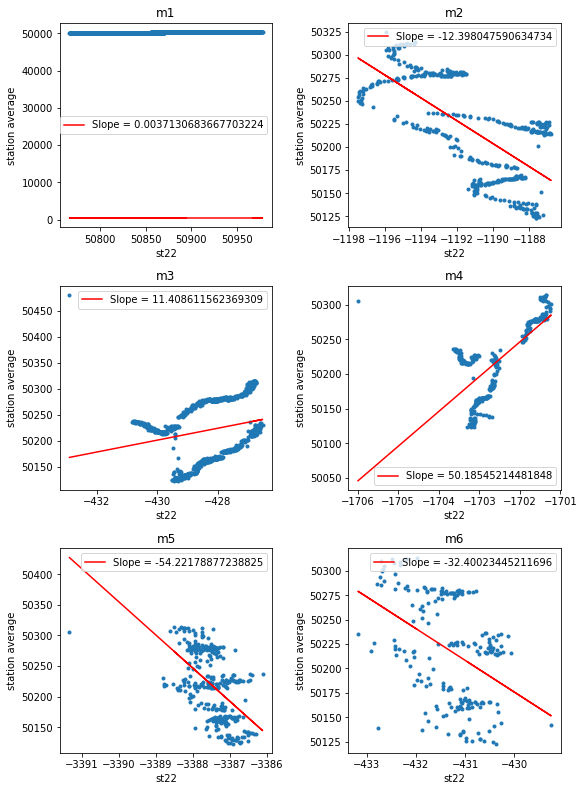

In [23]:
#vars1, cov1 = curve_fit(line,avgst22_1, avgsa_1)
vars2, cov2 = curve_fit(line,avgst22_2, avgsa_2)
vars3, cov3 = curve_fit(line,avgst22_3, avgsa_3)
vars4, cov4 = curve_fit(line,avgst22_4, avgsa_4)
vars5, cov5 = curve_fit(line,avgst22_5, avgsa_5)
vars6, cov6 = curve_fit(line,avgst22_6, avgsa_6)

fig, axs = plt.subplots(3,2, constrained_layout = True)
fig.set_figheight(11)
fig.set_figwidth(8)

axs[0,0].plot(st22m1_list, sa1,'.')
axs[0,0].plot(st22m1_list, line(st22m1_list, *vars1), 'r', label = "Slope = " + str(vars1[0]))
axs[0,0].set_xlabel("st22")
axs[0,0].set_ylabel("station average")
axs[0,0].set_title("m1")
axs[0,0].legend()

axs[0,1].plot(avgst22_2, avgsa_2,'.')
axs[0,1].plot(avgst22_2, line(avgst22_2, *vars2), 'r', label = "Slope = " + str(vars2[0]))
axs[0,1].set_xlabel("st22")
axs[0,1].set_ylabel("station average")
axs[0,1].set_title("m2")
axs[0,1].legend()

axs[1,0].plot(avgst22_3, avgsa_3,'.')
axs[1,0].plot(avgst22_3, line(avgst22_3, *vars3), 'r', label = "Slope = " + str(vars3[0]))
axs[1,0].set_xlabel("st22")
axs[1,0].set_ylabel("station average")
axs[1,0].set_title("m3")
axs[1,0].legend()

axs[1,1].plot(avgst22_4, avgsa_4,'.')
axs[1,1].plot(avgst22_4, line(avgst22_4, *vars4), 'r', label = "Slope = " + str(vars4[0]))
axs[1,1].set_xlabel("st22")
axs[1,1].set_ylabel("station average")
axs[1,1].set_title("m4")
axs[1,1].legend()

axs[2,0].plot(avgst22_5, avgsa_5,'.')
axs[2,0].plot(avgst22_5, line(avgst22_5, *vars5), 'r', label = "Slope = " + str(vars5[0]))
axs[2,0].set_xlabel("st22")
axs[2,0].set_ylabel("station average")
axs[2,0].set_title("m5")
axs[2,0].legend()

axs[2,1].plot(avgst22_6, avgsa_6,'.')
axs[2,1].plot(avgst22_6, line(avgst22_6, *vars6), 'r', label = "Slope = " + str(vars6[0]))
axs[2,1].set_xlabel("st22")
axs[2,1].set_ylabel("station average")
axs[2,1].set_title("m6")
axs[2,1].legend()

fig.suptitle("")


Text(0.5,0.98,'Comparing trolley differences with station 22 and station 21&23 average')

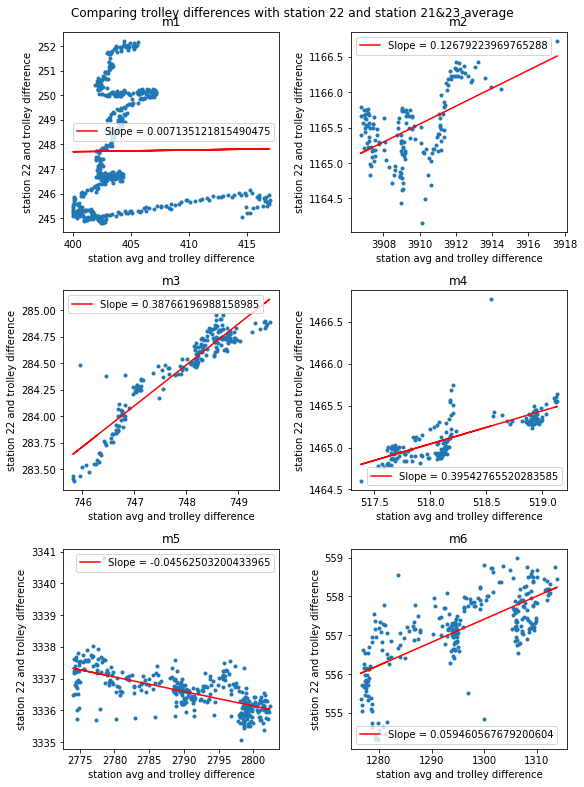

In [24]:
fig, axs = plt.subplots(3,2, constrained_layout = True)
fig.set_figheight(11)
fig.set_figwidth(8)

axs[0,0].plot(avgs1,avgn1,'.')
axs[0,0].plot(avgs1, line(avgs1, *vars_corr1), 'r', label = "Slope = " + str(vars_corr1[0]))
axs[0,0].set_xlabel("station avg and trolley difference")
axs[0,0].set_ylabel("station 22 and trolley difference")
axs[0,0].set_title("m1")
axs[0,0].legend()

axs[0,1].plot(avgs2,avgn2,'.')
axs[0,1].plot(avgs2, line(avgs2, *vars_corr2), 'r', label = "Slope = " + str(vars_corr2[0]))
axs[0,1].set_xlabel("station avg and trolley difference")
axs[0,1].set_ylabel("station 22 and trolley difference")
axs[0,1].set_title("m2")
axs[0,1].legend()

axs[1,0].plot(avgs3,avgn3,'.')
axs[1,0].plot(avgs3, line(avgs3, *vars_corr3), 'r', label = "Slope = " + str(vars_corr3[0]))
axs[1,0].set_xlabel("station avg and trolley difference")
axs[1,0].set_ylabel("station 22 and trolley difference")
axs[1,0].set_title("m3")
axs[1,0].legend()

axs[1,1].plot(avgs4,avgn4,'.')
axs[1,1].plot(avgs4, line(avgs4, *vars_corr4), 'r', label = "Slope = " + str(vars_corr4[0]))
axs[1,1].set_xlabel("station avg and trolley difference")
axs[1,1].set_ylabel("station 22 and trolley difference")
axs[1,1].set_title("m4")
axs[1,1].legend()

axs[2,0].plot(avgs5,avgn5,'.')
axs[2,0].plot(avgs5, line(avgs5, *vars_corr5), 'r', label = "Slope = " + str(vars_corr5[0]))
axs[2,0].set_xlabel("station avg and trolley difference")
axs[2,0].set_ylabel("station 22 and trolley difference")
axs[2,0].set_title("m5")
axs[2,0].legend()

axs[2,1].plot(avgs6,avgn6,'.')
axs[2,1].plot(avgs6, line(avgs6, *vars_corr6), 'r', label = "Slope = " + str(vars_corr6[0]))
axs[2,1].set_xlabel("station avg and trolley difference")
axs[2,1].set_ylabel("station 22 and trolley difference")
axs[2,1].set_title("m6")
axs[2,1].legend()

fig.suptitle("Comparing trolley differences with station 22 and station 21&23 average")

In [19]:
(T1, D1) =  difference(y1,avgt1)
print("1 runs done")
(T2, D2) =  difference(y2,avgt2)
print("2 runs done")
(T3, D3) =  difference(y3,avgt3)
print("3 runs done")
(T4, D4) =  difference(y4,avgt4)
print("4 runs done")
(T5, D5) =  difference(y5,avgt5)
print("5 runs done")
(T6, D6) =  difference(y6,avgt6)
print("6 runs done")

1 runs done
2 runs done
3 runs done
4 runs done
5 runs done
6 runs done


In [20]:
(Tss1, Dss1) =  difference(ss1,avgts1)
print("1 run(s) done")
(Tss2, Dss2) =  difference(ss2,avgts2)
print("2 run(s) done")
(Tss3, Dss3) =  difference(ss3,avgts3)
print("3 run(s) done")
(Tss4, Dss4) =  difference(ss4,avgts4)
print("4 run(s) done")
(Tss5, Dss5) =  difference(ss5,avgts5)
print("5 run(s) done")
(Tss6, Dss6) =  difference(ss6,avgts6)
print("6 run(s) done")

In [21]:
(Tts1, Dts1) =  difference(st1,avgtt1)
print("1 run(s) done")
(Tts2, Dts2) =  difference(st2,avgtt2)
print("2 run(s) done")
(Tts3, Dts3) =  difference(st3,avgtt3)
print("3 run(s) done")
(Tts4, Dts4) =  difference(st4,avgtt4)
print("4 run(s) done")
(Tts5, Dts5) =  difference(st5,avgtt5)
print("5 run(s) done")
(Tts6, Dts6) =  difference(st6,avgtt6)
print("6 run(s) done")

1 run(s) done
2 run(s) done
3 run(s) done
4 run(s) done
5 run(s) done
6 run(s) done


In [22]:
T1   = T1   + run_start
T2   = T2   + run_start
T3   = T3   + run_start
T4   = T4   + run_start
T5   = T5   + run_start
T6   = T6   + run_start

Tss1 = Tss1 + run_start
Tss2 = Tss2 + run_start
Tss3 = Tss3 + run_start
Tss4 = Tss4 + run_start
Tss5 = Tss5 + run_start
Tss6 = Tss6 + run_start

#The time was set to start at 0 in the allan deviation plots, we must add back the starting time
Tts1 = Tts1 + run_start
Tts2 = Tts2 + run_start
Tts3 = Tts3 + run_start
Tts4 = Tts4 + run_start
Tts5 = Tts5 + run_start
Tts6 = Tts6 + run_start

In [52]:
max(np.delete(Dts2,0))
min(Dts2)

3906.705787266938

Text(0.5,0.98,'Comparing trolley and station 22 difference with trolley and st21 and st23 average')

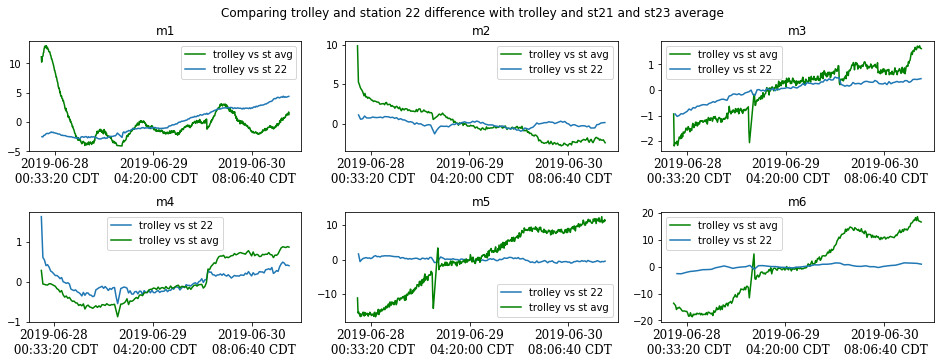

In [34]:
#https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/broken_axis.html
ts = "trolley vs st avg"
N  = "trolley vs st 22" 
fig, axs = plt.subplots(2,3,constrained_layout=True)
fig.set_figheight(5)
fig.set_figwidth(13)

axs[0,0].plot(Tts1, Dts1 - np.average(Dts1), 'g', label = ts)
#axs[0,0].set_ylim(400, 407)
axs[0,0].legend()
axs[0,0].set_title("m1")
axs[0,0].plot(T1, D1 - np.average(D1), label = N)
axs[0,0].legend()
#axs[0,0].set_ylim(245,252)

#axs[0,0].spines['bottom'].set_visible(False)
#axs[0,0].xaxis.tick_top()
#axs[0,0].tick_params(labeltop = False)
plt_unix_time_to_CST(axs[0,0])
#axs[0,0].spines['top'].set_visible(False)
#axs[0,0].xaxis.tick_bottom()
plt_unix_time_to_CST(axs[0,0])
###
axs[0,1].plot(Tts2, Dts2 - np.average(Dts2), 'g', label = ts)
#axs[0,1].set_ylim(3906, 3915)
axs[0,1].legend()
axs[0,1].set_title("m2")
axs[0,1].plot(T2, D2 - np.average(D2), label = N)
axs[0,1].legend()
#axs[0,1].set_ylim(1159, 1167)

#axs[0,1].spines['bottom'].set_visible(False)
#axs[0,1].xaxis.tick_top()
#axs[0,1].tick_params(labeltop = False)
plt_unix_time_to_CST(axs[0,1])
#axs[0,1].spines['top'].set_visible(False)
#axs[0,1].xaxis.tick_bottom()
plt_unix_time_to_CST(axs[0,1])
###
axs[0,2].plot(Tts3, Dts3 - np.average(Dts3), 'g', label = ts)
#axs[0,2].set_ylim(745, 750)
axs[0,2].legend()
axs[0,2].set_title("m3")
axs[0,2].plot(T3, D3 - np.average(D3), label = N)
axs[0,2].legend()
#axs[0,2].set_ylim(280, 285)

#axs[0,2].spines['bottom'].set_visible(False)
#axs[0,2].xaxis.tick_top()
#axs[0,2].tick_params(labeltop = False)
plt_unix_time_to_CST(axs[0,2])
#axs[0,2].spines['top'].set_visible(False)
#axs[0,2].xaxis.tick_bottom()
plt_unix_time_to_CST(axs[0,2])
##############
axs[1,0].plot(T4, D4 - np.average(D4), label = N)
#axs[1,0].set_ylim(1464,1466)
axs[1,0].legend()
axs[1,0].set_title("m4")
axs[1,0].plot(Tts4, Dts4 - np.average(Dts4), 'g', label = ts)
axs[1,0].legend()
#axs[1,0].set_ylim(517.25, 519.25)

#axs[1,0].spines['bottom'].set_visible(False)
#axs[1,0].xaxis.tick_top()
#axs[1,0].tick_params(labeltop = False)
plt_unix_time_to_CST(axs[1,0])
#axs[1,0].spines['top'].set_visible(False)
#axs[1,0].xaxis.tick_bottom()
plt_unix_time_to_CST(axs[1,0])
###
axs[1,1].plot(T5, D5 - np.average(D5), label = N)
#axs[1,1].set_ylim(3320, 3350)
axs[1,1].legend()
axs[1,1].set_title("m5")
axs[1,1].plot(Tts5, Dts5 - np.average(Dts5), 'g', label = ts)
axs[1,1].legend()
#axs[1,1].set_ylim(2775, 2805)

#axs[1,1].spines['bottom'].set_visible(False)
#axs[1,1].xaxis.tick_top()
#axs[1,1].tick_params(labeltop = False)
plt_unix_time_to_CST(axs[1,1])
#axs[1,1].spines['top'].set_visible(False)
#axs[1,1].xaxis.tick_bottom()
plt_unix_time_to_CST(axs[1,1])
###
axs[1,2].plot(Tts6, Dts6 - np.average(Dts6), 'g', label = ts)
#axs[1,2].set_ylim(1275, 1315)
axs[1,2].legend()
axs[1,2].set_title("m6")
axs[1,2].plot(T6, D6 - np.average(D6), label = N)
axs[1,2].legend()
#axs[1,2].set_ylim(530, 570)

#axs[1,2].spines['bottom'].set_visible(False)
#axs[1,2].xaxis.tick_top()
#axs[1,2].tick_params(labeltop = False)
plt_unix_time_to_CST(axs[1,2])
#axs[1,2].spines['top'].set_visible(False)
#axs[1,2].xaxis.tick_bottom()
plt_unix_time_to_CST(axs[1,2])

fig.suptitle("Comparing trolley and station 22 difference with trolley and st21 and st23 average")

In [33]:
#This is trolley Vs st 22                                                  #this is before I learned about subplots 
#plt.subplot(3,2,1)
#plt.loglog(t1, ad1) # Plot the results trolley and st 22
#plt.title("A Dev tr and fp m1")
#plt.xlabel("Time in s, min at " + str(avgt1))
#plt.ylabel("Allan Deviation")

#plt.subplot(3,2,3)
#plt.loglog(t2, ad2) # Plot the results
#plt.title("A Dev tr and fp m2")
#plt.xlabel("Time in s, min at "+ str(avgt2))
#plt.ylabel("Allan Deviation")

#plt.subplot(3,2,7)
#plt.loglog(t3, ad3) # Plot the results
#plt.title("A Dev tr and fp m3")
#plt.xlabel("Time in s, min at "+ str(avgt3))
#plt.ylabel("Allan Deviation")

#plt.subplot(3,2,9)
#plt.loglog(t4, ad4) # Plot the results
#plt.title("A Dev tr and fp m4")
#plt.xlabel("Time in s, min at "+ str(avgt4))
#plt.ylabel("Allan Deviation")

#plt.subplot(3,2,13)
#plt.loglog(t5, ad5) # Plot the results
#plt.title("A Dev tr and fp m5")
#plt.xlabel("Time in s, min at "+ str(avgt5))
#plt.ylabel("Allan Deviation")

#plt.subplot(3,2,15)
#plt.loglog(t6, ad6) # Plot the results
#plt.title("A Dev tr and fp m6")
#plt.xlabel("Time in s, min at "+ str(avgt6))
#plt.ylabel("Allan Deviation")
#plt.show()
########################################################################################
#This is station 21 and 23 average vs trolley
#fig = plt.loglog(tt1, adt1) # Plot the results trolley avg and st22
#plt.title("Allan Deviation for difference between tp and st. avg m1")
#plt.xlabel("Time in s, min at " + str(avgtt1))
#plt.ylabel("Allan Deviation")
#plt.show()

#fig = plt.loglog(tt2, adt2) # Plot the results
#plt.title("Allan Deviation for difference between tp and st. avg m2")
#plt.xlabel("Time in s, min at "+ str(avgtt2))
#plt.ylabel("Allan Deviation")
#plt.show()

#fig = plt.loglog(tt3, adt3) # Plot the results
#plt.title("Allan Deviation for difference between tp and st. avg m3")
#plt.xlabel("Time in s, min at "+ str(avgtt3))
#plt.ylabel("Allan Deviation")
#plt.show()

#fig = plt.loglog(tt4, adt4) # Plot the results
#plt.title("Alsan Deviation for difference between tp and st. avg m4")
#plt.xlabel("Time in s, min at "+ str(avgtt4))
#plt.ylabel("Allan Deviation")
#plt.show()

#fig = plt.loglog(tt5, adt5) # Plot the results
#plt.title("Allan Deviation for difference between tp and st. avg m5")
#plt.xlabel("Time in s, min at "+ str(avgtt5))
#plt.ylabel("Allan Deviation")
#plt.show()

#fig = plt.loglog(tt6, adt6) # Plot the results
#plt.title("Allan Deviation for difference between tp and st. avg m6")
#plt.xlabel("Time in s, min at "+ str(avgtt6))
#plt.ylabel("Allan Deviation")
#plt.show()

################################################################################################
#This is St 22 vs st21 and 23 average
#fig = plt.loglog(ts1, ads1) # Plot the results station avg and st22
#plt.title("Allan Deviation for difference between st22 and st. avg m1")
#plt.xlabel("Time in s, min at " + str(avgts1))
#plt.ylabel("Allan Deviation")
#plt.show()

#fig = plt.loglog(ts2, ads2) # Plot the results
#plt.title("Allan Deviation for difference between st22 and st. avg m2")
#plt.xlabel("Time in s, min at "+ str(avgts2))
#plt.ylabel("Allan Deviation")
#plt.show()

#fig = plt.loglog(ts3, ads3) # Plot the results
#plt.title("Allan Deviation for difference between st22 and st. avg m3")
#plt.xlabel("Time in s, min at "+ str(avgts3))
#plt.ylabel("Allan Deviation")
#plt.show()

#fig = plt.loglog(ts4, ads4) # Plot the results
#plt.title("Allan Deviation for difference between st22 and st. avg m4")
#plt.xlabel("Time in s, min at "+ str(avgts4))
#plt.ylabel("Allan Deviation")
#plt.show()

#fig = plt.loglog(ts5, ads5) # Plot the results
#plt.title("Allan Deviation for difference between st22 and st. avg m5")
#plt.xlabel("Time in s, min at "+ str(avgts5))
#plt.ylabel("Allan Deviation")
#plt.show()

#fig = plt.loglog(ts6, ads6) # Plot the results
#plt.title("Allan Deviation for difference between st22 and st. avg m6")
#plt.xlabel("Time in s, min at "+ str(avgts6))
#plt.ylabel("Allan Deviation")
#plt.show()

ValueError: x and y must have same first dimension, but have shapes (266L,) and (735L,)

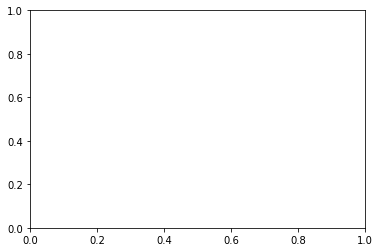